<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [59]:
hh_data = pd.read_csv('C:/Users/nick-/Documents/DS/projects/SF_tasks/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [60]:
print(hh_data.head(10))
print(hh_data.tail(10))

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
5    Мужчина ,  29 лет , родился 5 октября 1989   25000 руб.   
6  Мужчина ,  46 лет , родился 19 сентября 1972  250000 руб.   
7       Мужчина ,  29 лет , родился 9 июля 1989   70000 руб.   
8      Мужчина ,  29 лет , родился 11 июля 1989   65000 руб.   
9      Мужчина ,  34 года , родился 26 мая 1984   55000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4              

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [61]:
print(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [62]:
print(hh_data.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [63]:
copy_hh = hh_data.copy()

def get_edu(education):
    edu_list = education.split(' ')
    if edu_list[1] == 'образование':
        edu_type = edu_list[0].lower()
    else:
        edu_type = edu_list[0].lower() + " " + edu_list[1].lower()
    return edu_type

edu_type = copy_hh['Образование и ВУЗ'].apply(get_edu)
copy_hh['Образование'] = edu_type
print(copy_hh['Образование'].unique())
copy_hh = copy_hh.drop('Образование и ВУЗ', axis=1)

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [64]:
sex_type_new = copy_hh['Пол, возраст'].apply(lambda x: 'М' if x.split(' ')[0] == 'Мужчина' else 'Ж')
age_type = copy_hh['Пол, возраст'].apply(lambda x: int(x.split(' ')[3]))
copy_hh['Пол'] = sex_type_new
copy_hh['Возраст'] = age_type
copy_hh = copy_hh.drop('Пол, возраст', axis=1)


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [65]:
def get_experience(exp):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    if isinstance(exp, float):
        return None
    else:
        args_splited = exp.split(' ')
        month = 0
        year = 0
        if len(args_splited) < 7:
            for i in range(len(args_splited)):
                if args_splited[i] in month_key_words:
                    month = args_splited[i-1]
                if args_splited[i] in year_key_words:
                    year = args_splited[i-1]
        else:
            for i in range(7):
                if args_splited[i] in month_key_words:
                    month = args_splited[i-1]
                if args_splited[i] in year_key_words:
                    year = args_splited[i-1]
        tot_m = int(year)*12 + int(month)
        return tot_m


total_months = copy_hh['Опыт работы'].apply(get_experience)
copy_hh['Опыт работы (месяц)'] = total_months
copy_hh = copy_hh.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [66]:
# определяем город


def get_city(city):
    capital_cities = ['Москва', 'Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара',
                      'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    line_splited = city.split(' , ')
    if line_splited[0] in capital_cities:
        return line_splited[0]
    elif line_splited[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'


city_list = copy_hh['Город, переезд, командировки'].apply(get_city)
copy_hh['Город'] = city_list


#  определяем готовность к переезду, готовность к командировкам


def get_move(move):
    line_splited = move.split(' , ')
    if line_splited[1].find('м.') != -1:
        if line_splited[2].find('не') != -1:
            return False
        else:
            return True
    else:
        if line_splited[1].find('не') != -1:
            return False
        else:
            return True


ready_move = copy_hh['Город, переезд, командировки'].apply(get_move)
copy_hh['Готовность к переезду'] = ready_move


def get_visit(move):
    line_splited = move.split(' , ')
    if line_splited[1].find('м.') != -1:
        if len(line_splited) < 4:
            return True
        else:
            if line_splited[3].find('не') != -1:
                return False
            else:
                return True
    else:
        if len(line_splited) < 3:
            return True
        else:
            if line_splited[2].find('не') != -1:
                return False
            else:
                return True


ready_visit = copy_hh['Город, переезд, командировки'].apply(get_visit)
copy_hh['Готовность к командировкам'] = ready_visit
copy_hh = copy_hh.drop('Город, переезд, командировки', axis=1)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [67]:

work_occupancy = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for occupancy in work_occupancy:
    copy_hh[occupancy] = copy_hh['Занятость'].apply(lambda x: occupancy in x)


work_schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for schedule in work_schedule:
    copy_hh[schedule] = copy_hh['График'].apply(lambda x: schedule in x)

copy_hh = copy_hh.drop(['Занятость'], axis=1)
copy_hh = copy_hh.drop(['График'], axis=1)
display(copy_hh)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,True,False,False,False,False,True,False,False,True,False
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,True,True,False,False,True,True,True,True,False
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,True,False,False,False,False,True,False,False,True,False
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,True,True,False,False,False,False,False,False,True,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [68]:
currency_data = pd.read_csv('C:/Users/nick-/Documents/DS/projects/SF_tasks/ExchangeRates.csv', sep=',')
currency_data['date'] = pd.to_datetime(currency_data['date']).dt.date
copy_hh['Обновление резюме'] = pd.to_datetime(copy_hh['Обновление резюме']).dt.date

copy_hh['ЗП (temp)'] = copy_hh['ЗП'].apply(lambda x: float(x.split(' ')[0]))


def get_currencies(arg):
    currencies = {'грн.':'UAH','USD':'USD','EUR':'EUR','бел.руб.':'BYN','KGS':'KGS','сум':'UZS','AZN':'AZN','KZT':'KZT','руб.':'руб.'}
    arg = arg.split(' ')
    value = currencies[arg[1]]
    return value


copy_hh['Курс (temp)'] = copy_hh['ЗП'].apply(get_currencies)

merged_hh = copy_hh.merge(
    currency_data,
    left_on=['Курс (temp)', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left')

merged_hh['close'] = merged_hh['close'].fillna(1)
merged_hh['proportion'] = merged_hh['proportion'].fillna(1)
copy_hh['ЗП (руб)'] = merged_hh['close'] * merged_hh['ЗП (temp)'] / merged_hh['proportion']
copy_hh = copy_hh.drop(['ЗП', 'ЗП (temp)', 'Курс (temp)'], axis=1)
display(copy_hh)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,False,True,False,False,True,False,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,True,False,False,True,True,True,True,False,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-09-04,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,False,True,False,False,True,False,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,True,False,False,False,False,False,False,True,False,20000.0











































































































































































































































































































































































































































































































































































































































































































































































































































































































# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

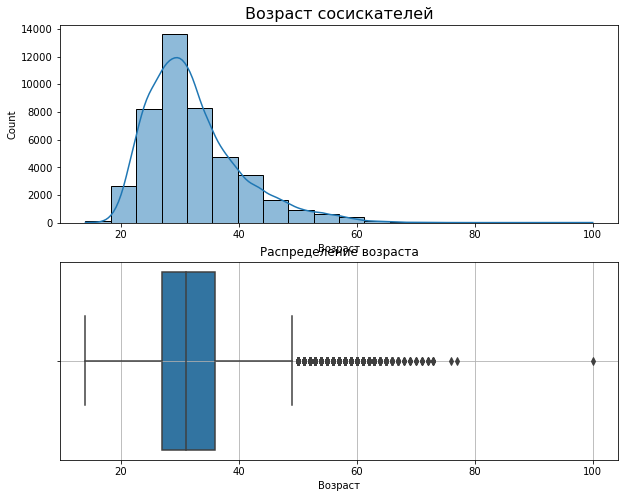

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=copy_hh,
    x='Возраст',
    bins=20,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Возраст сосискателей', fontsize=16)
sns.boxplot(
    data=copy_hh,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение возраста');
axes[1].grid()
plt.show()

Мода распределения находится на значении 30, в то время как медиана находится на значении 31, что очень близко.
Минимальный возраст - 14 лет,
Максимальный возраст - 100 лет, что очень похоже на выброс.
50% распределения находится в интервале от 27 до 36 лет.
Большая часть распределения находится в интервале от 14 до 49 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

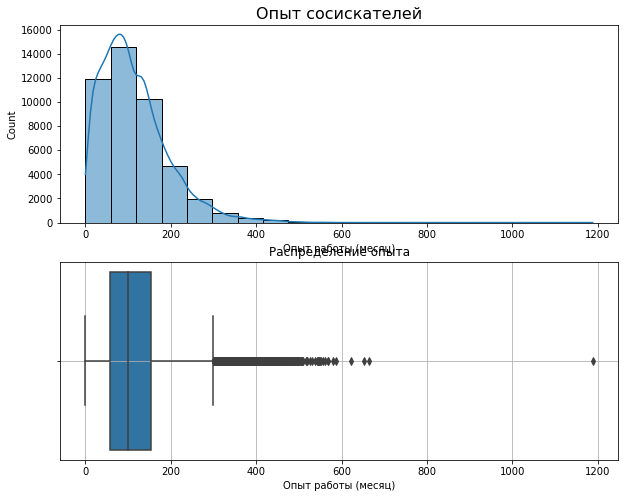

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=copy_hh,
    x='Опыт работы (месяц)',
    bins=20,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Опыт сосискателей', fontsize=16)
sns.boxplot(
    data=copy_hh,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение опыта');
axes[1].grid()
plt.show()

Мода распределения находится на значении 81 месяц, в то время как медиана находится на значении 100 месяцев.
Минимальный опыт - 0 месяцев (без опыта),
Максимальный возраст - 1188 месяцев, что очень похоже на выброс.
50% распределения находится в интервале от 57 до 154 месяцев.
Большая часть распределения находится в интервале от 0 до 299 месяцев.
В рапределении присутствует левая ассиметрия, но очень логично похоже на реальную жизнь, так как меньше соискателей с большим опытом ищут работу.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


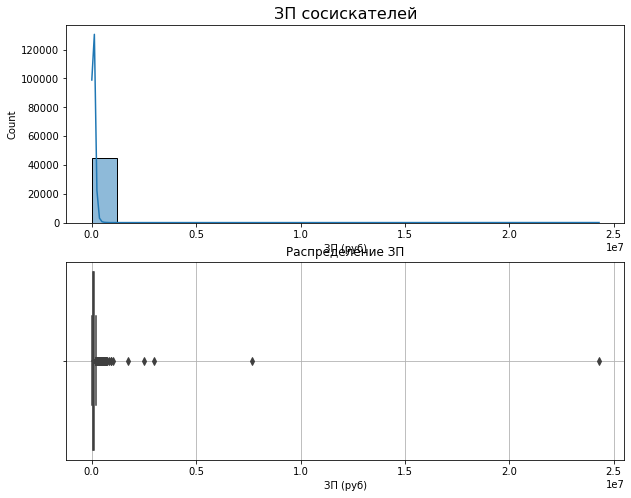

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=copy_hh,
    x='ЗП (руб)',
    bins=20,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('ЗП сосискателей', fontsize=16)
sns.boxplot(
    data=copy_hh,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение ЗП');
axes[1].grid()
plt.show()

Предельные значения для признака ЗП(руб.):
Минимальное - 1 руб.;
Максимальное - 24.3 млн руб.
50% выборки находится в интервале от 37 тыс. руб. до 95 тыс. руб.
Большая часть выборки находится в интервале от 1 руб. до 181 тыс.руб.
5 значений значительно выбиваются из выборки - соискатели хотят ЗП более 1 млн руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

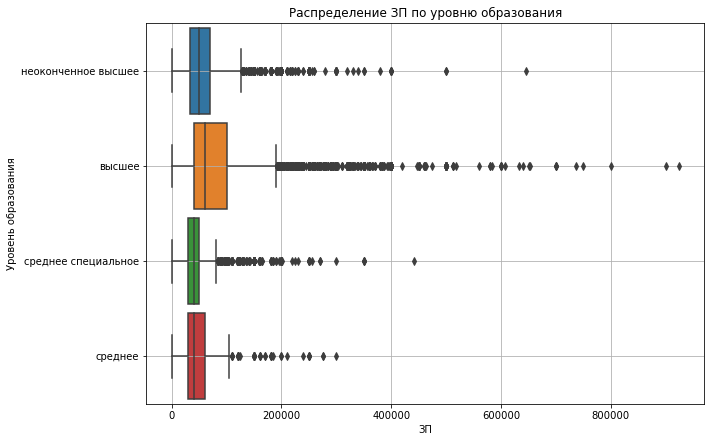

In [72]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    y='Образование',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ЗП по уровню образования');
boxplot.set_xlabel('ЗП');
boxplot.set_ylabel('Уровень образования');
boxplot.grid()
plt.show()

# для plotly
# bar_data = copy_hh[copy_hh['ЗП (руб)']<1000000].groupby(
#     by='Образование',
#     as_index=False
# )[['ЗП (руб)']].median().round(2)
# print(bar_data)

# fig = px.bar(
#     data_frame=bar_data, #датафрейм
#     x="Образование", #ось x
#     y="ЗП (руб)", #ось y
#     color='Образование', #расцветка в зависимости от страны
#     orientation='v', #ориентация графика
#     height=500, #высота
#     width=1000, #ширина
#     title='Медианная ЗП в зависимости от уровня образования' #заголовок
# )
# fig.show()

Наибольший уровень требуемой ЗП соответствует высшему образованию, в то время как наименьший уровень требуемой ЗП (медианное значение) соответсвует среднему и средему специальному образовани. Таким образом, признак образования может быть значительным для прогнозирования ожидаемой ЗП.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

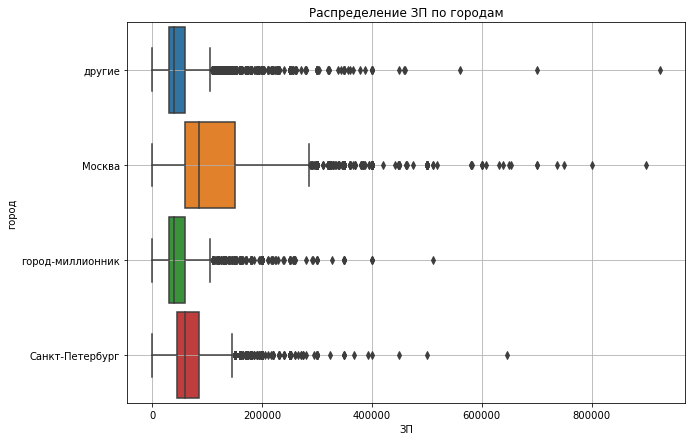

In [73]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    y='Город',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ЗП по городам');
boxplot.set_xlabel('ЗП');
boxplot.set_ylabel('город');
boxplot.grid()
plt.show()

# для plotly
# fig = px.bar(
#     data_frame=bar_data, #датафрейм
#     x="Город", #ось x
#     y="ЗП (руб)", #ось y
#     color='Город', #расцветка в зависимости от страны
#     orientation='v', #ориентация графика
#     height=500, #высота
#     width=1000, #ширина
#     title='Медианная ЗП в зависимости от города' #заголовок
# )
# fig.show()

Наибольшие медианные значения для ЗП находятся в городах Москва и Санкт-Петербург, наименьшие в то же время в категориях города-миллионники и другие города. Категории города-миллионники и другие города имеют очень схожее распределение ЗП. Таким образом, кол-во категорий можно сократить до 3 (Москва, Санкт-Петербург и другие) и предсказательная функция ЗП не должна измениться.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

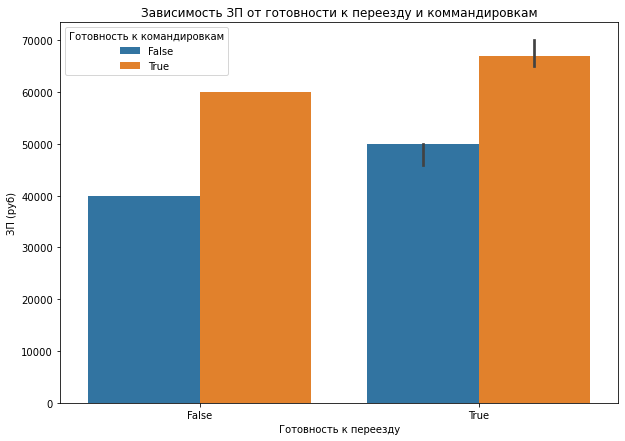

In [78]:
from numpy import median
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    estimator=median,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам'
);
barplot.set_title('Зависимость ЗП от готовности к переезду и коммандировкам');
plt.show()

Соискатели, готовые к переезду требуют более высокую ЗП, также как и соискатели, готовые к коммандировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

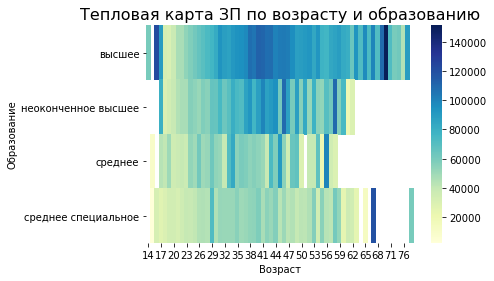

In [83]:
pivot = copy_hh.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
)
pivot.columns = pivot.columns.astype('string')

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ЗП по возрасту и образованию', fontsize=16);
plt.show()


Для высшего и неоконченного высшего образований характерна концентрация наиболее высоких зарплат в среднем в возрасте от 35 лет до 50 лет, в то время как для среднего и среднего специального образований такая тенденция ниже. Кроме того, отчетлива видна разница в сумме ожидаемых зарплат с увеличением возраста для различных уровней образования - наиболее высокая для соискателей с высшим образованием. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

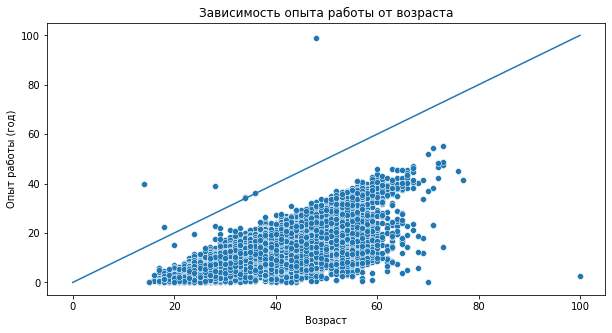

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44576 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

None

In [85]:
fig = plt.figure(figsize=(10, 7))
scatter_data = copy_hh.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data,
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');
plt.show()


Есть несколько аномалий в данных

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


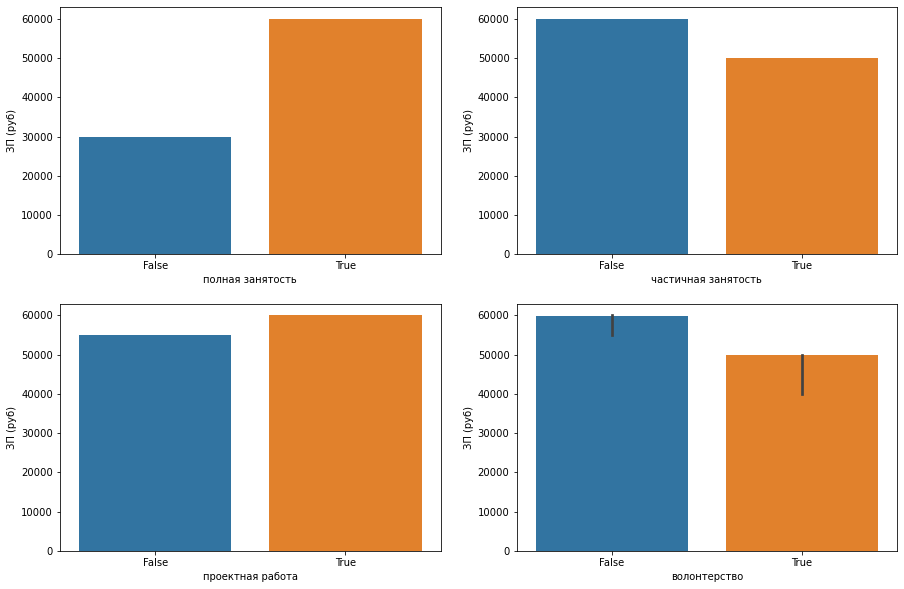

In [87]:
from numpy import median
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.barplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    estimator=median,
    x='полная занятость',
    y='ЗП (руб)',
    ax=axes[0,0]
);
sns.barplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    estimator=median,
    x='частичная занятость',
    y='ЗП (руб)',
    ax=axes[0,1]
);
sns.barplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    estimator=median,
    x='проектная работа',
    y='ЗП (руб)',
    ax=axes[1,0]
);
sns.barplot(
    data=copy_hh[copy_hh['ЗП (руб)']<1000000],
    estimator=median,
    x='волонтерство',
    y='ЗП (руб)',
    ax=axes[1,1]
);
plt.show()

Полная занятость и проектная работа дает более высокую требуемую ЗП, чем их отстутствие. В то время как не частичная занятость и не волонтерство дает более высокую ЗП.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [89]:
dupl_columns = list(copy_hh.columns)
hh_dedupped = copy_hh.drop_duplicates(subset=dupl_columns)
display(hh_dedupped.shape[0])

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [90]:
null_data = hh_dedupped.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                166
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [91]:
fill_hh = hh_dedupped.copy()
values = {
    'Опыт работы (месяц)': fill_hh['Опыт работы (месяц)'].median()}
fill_hh = fill_hh.fillna(values)

drop_hh = fill_hh.copy()
drop_hh = drop_hh.dropna(how='any', axis=0)
display(drop_hh.shape[0])

44581

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [101]:
outliers = drop_hh[(drop_hh['ЗП (руб)'] > 1000000) | (drop_hh['ЗП (руб)'] < 1000)]
drop_hh = drop_hh.drop(outliers.index)
display(drop_hh.info())

89
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44492 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44492 non-null  object 
 1   Последнее/нынешнее место работы  44492 non-null  object 
 2   Последняя/нынешняя должность     44492 non-null  object 
 3   Обновление резюме                44492 non-null  object 
 4   Авто                             44492 non-null  object 
 5   Образование                      44492 non-null  object 
 6   Пол                              44492 non-null  object 
 7   Возраст                          44492 non-null  int64  
 8   Опыт работы (месяц)              44492 non-null  float64
 9   Город                            44492 non-null  object 
 10  Готовность к переезду            44492 non-null  bool   
 11  Готовность к командировкам       44492 non-null  bool   
 12  полная занятост

None

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [104]:
outliers_1 = drop_hh[drop_hh['Возраст']<=(drop_hh['Опыт работы (месяц)']/12)]
drop_hh = drop_hh.drop(outliers_1.index)
display(drop_hh.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44485 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44485 non-null  object 
 1   Последнее/нынешнее место работы  44485 non-null  object 
 2   Последняя/нынешняя должность     44485 non-null  object 
 3   Обновление резюме                44485 non-null  object 
 4   Авто                             44485 non-null  object 
 5   Образование                      44485 non-null  object 
 6   Пол                              44485 non-null  object 
 7   Возраст                          44485 non-null  int64  
 8   Опыт работы (месяц)              44485 non-null  float64
 9   Город                            44485 non-null  object 
 10  Готовность к переезду            44485 non-null  bool   
 11  Готовность к командировкам       44485 non-null  bool   
 12  полная занятость  

None

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

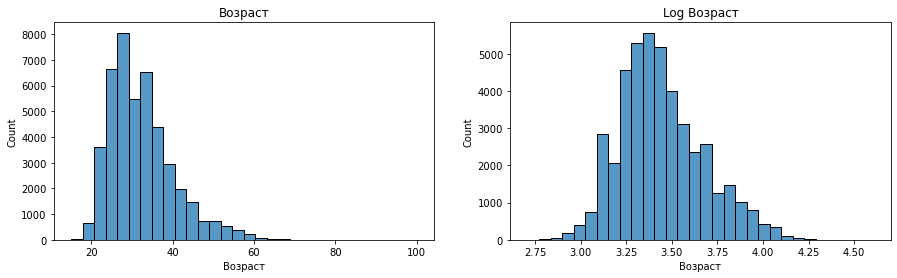

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44482 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44482 non-null  object 
 1   Последнее/нынешнее место работы  44482 non-null  object 
 2   Последняя/нынешняя должность     44482 non-null  object 
 3   Обновление резюме                44482 non-null  object 
 4   Авто                             44482 non-null  object 
 5   Образование                      44482 non-null  object 
 6   Пол                              44482 non-null  object 
 7   Возраст                          44482 non-null  int64  
 8   Опыт работы (месяц)              44482 non-null  float64
 9   Город                            44482 non-null  object 
 10  Готовность к переезду            44482 non-null  bool   
 11  Готовность к командировкам       44482 non-null  bool   
 12  полная занятость  

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(drop_hh['Возраст'], bins=30, ax=axes[0])
histplot.set_title('Возраст');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(drop_hh['Возраст'])
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log Возраст');
plt.show()


def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(drop_hh, 'Возраст', log_scale=True)
cleaned_hh = cleaned.copy()
print(cleaned_hh.info())
print(f'Кол-во выбросов = {outliers.shape[0]}')